In [2]:
import omdb
import os
import pandas as pd
import numpy as np
import requests
import datetime
from scipy import stats
import scipy.stats as stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.font_manager import FontProperties

In [3]:
# Read CSV
df = pd.read_csv('All_Movies_Working.csv',encoding='latin-1')
df = df.dropna()

In [4]:
df

,Title,Metascore,Rated,Runtime,Released,Genre,Box Office,imdb_rating,imdb_votes,imdb_source,imdb_score,rotten_source,rotten_score,metacrit_source,metacrit_score,release_month,release_year
0,Beowulf,59.0,PG-13,115 min,16 Nov 2007,"Animation, Action, Adventure, Fantasy",82200000.0,6.2,"155,920",Internet Movie Database,6.2,Rotten Tomatoes,7.1,Metacritic,5.9,11,2007
1,But I'm a Cheerleader,39.0,R,85 min,11 Aug 2000,"Comedy, Drama, Romance",175182.0,6.6,"23,614",Internet Movie Database,6.6,Rotten Tomatoes,3.9,Metacritic,3.9,8,2000
2,Flawless,57.0,PG-13,108 min,28 Mar 2008,"Crime, Drama, Thriller",1146525.0,6.8,"21,901",Internet Movie Database,6.8,Rotten Tomatoes,5.5,Metacritic,5.7,3,2008
3,Gloria,83.0,R,110 min,09 May 2013,"Comedy, Drama, Romance",1587655.0,6.8,"7,804",Internet Movie Database,6.8,Rotten Tomatoes,9.9,Metacritic,8.3,5,2013
4,Life,54.0,R,104 min,24 Mar 2017,"Horror, Sci-Fi, Thriller",30180466.0,6.6,"185,922",Internet Movie Database,6.6,Rotten Tomatoes,6.8,Metacritic,5.4,3,2017
5,102 Dalmatians,35.0,G,100 min,22 Nov 2000,"Adventure, Comedy, Family",65406212.0,4.9,"32,329",Internet Movie Database,4.9,Rotten Tomatoes,3.1,Metacritic,3.5,11,2000
6,The 6th Day,49.0,PG-13,123 min,17 Nov 2000,"Action, Mystery, Sci-Fi, Thriller",33813823.0,5.9,"111,461",Internet Movie Database,5.9,Rotten Tomatoes,4.1,Metacritic,4.9,11,2000
7,All the Pretty Horses,55.0,PG-13,116 min,25 Dec 2000,"Drama, Romance, Western",14713716.0,5.8,"12,479",Internet Movie Database,5.8,Rotten Tomatoes,3.2,Metacritic,5.5,12,2000
8,Almost Famous,90.0,R,122 min,22 Sep 2000,"Adventure, Comedy, Drama, Music",31716715.0,7.9,"237,103",Internet Movie Database,7.9,Rotten Tomatoes,8.9,Metacritic,9.0,9,2000
9,The Art of War,30.0,R,117 min,25 Aug 2000,"Action, Adventure, Crime, Thriller",29458928.0,5.7,"27,552",Internet Movie Database,5.7,Rotten Tomatoes,1.6,Metacritic,3.0,8,2000


In [5]:
df["release_month"] = df["release_month"].astype(int)

In [6]:
# Define season based on month

months = df["release_month"]

spring = range(3, 5)
summer = range(6, 8)
fall = range(9, 11)

season = []

for month in months:
    if month in spring:
        season.append('Spring')
    elif month in summer:
        season.append('Summer')
    elif month in fall:
        season.append('Fall')
    else:
        season.append('Winter')

In [7]:
# Insert season value into dataframe
df["season"] = season

In [8]:
# Create stripped down dataframe
season_df = df[["season", "Box Office", "release_year"]]

In [9]:
# Review season splits
df["season"].value_counts()

Winter    1357
Fall       523
Spring     465
Summer     447
Name: season, dtype: int64

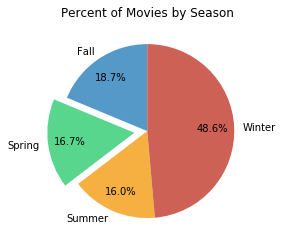

In [10]:
# Evaluate seasons by percentage
seasons_count = season_df.groupby(['season'])['Box Office'].count()
percentage = (seasons_count/seasons_count.sum())*100
labels = percentage.index
colors = ['#5499C7','#58D68D','#F5B041','#CD6155']
explode = (0, 0.15, 0, 0)
plt.pie(percentage, labels = labels, startangle=90, autopct='%1.1f%%', colors = colors, explode = explode, pctdistance = .75)
plt.title("Percent of Movies by Season")
plt.savefig('season_images/SeasonCounts.png')
plt.show()

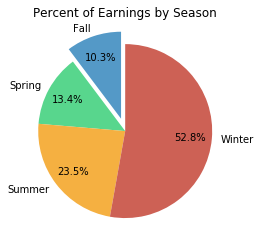

In [11]:
# Evaluate earnings by season
seasons_earnings = season_df.groupby(['season'])['Box Office'].sum()
earnings_percentage = (seasons_earnings/seasons_earnings.sum())*100
labels = percentage.index
colors = ['#5499C7','#58D68D','#F5B041','#CD6155']
explode = (0.15, 0, 0, 0)
plt.pie(earnings_percentage, labels = labels, startangle=90, autopct='%1.1f%%', colors = colors, explode = explode, pctdistance = .75)
plt.title("Percent of Earnings by Season")
plt.savefig('season_images/SeasonEarnings.png')
plt.show()

In [12]:
# Evaluate performance based on earnings vs. counts
percentage_df = percentage.reset_index()

earnings_percentage_df = earnings_percentage.reset_index()

percentage_df.columns = ["season", "% of Movies"]

earnings_percentage_df.columns = ["season2", "% of Earnings"]

overview = pd.concat([percentage_df, earnings_percentage_df], axis=1, join='inner')

overview = overview[["season","% of Movies","% of Earnings"]]

overview["Performance"] = round(overview["% of Earnings"]/overview["% of Movies"] * 100,1)

display(overview.sort_values(by="Performance",ascending=False))

,season,% of Movies,% of Earnings,Performance
2,Summer,16.010029,23.524257,146.9
3,Winter,48.603152,52.811787,108.7
1,Spring,16.654728,13.393461,80.4
0,Fall,18.732092,10.270496,54.8


In [13]:
# Group by season
df_groupseason = season_df.groupby(['season', 'release_year'])["Box Office"].sum()

In [14]:
df_groupseason = df_groupseason.reset_index()

# Displaying box office dollars in billions for an easier view
df_groupseason["Box Office"] = df_groupseason["Box Office"]/1000000000

# Removing year 2018 since there is only partial seasonal data
df_groupseason = df_groupseason.loc[df_groupseason["release_year"]<2018]

df_groupseason 

,season,release_year,Box Office
0,Fall,2000,0.524176
1,Fall,2001,0.509410
2,Fall,2002,0.861669
3,Fall,2003,0.860402
4,Fall,2004,0.859933
5,Fall,2005,0.713332
6,Fall,2006,0.984220
7,Fall,2007,0.804026
8,Fall,2008,1.065409
9,Fall,2009,0.897469


In [15]:
# Group by year
df_groupyear = season_df.groupby(['release_year'])["Box Office"].sum()

In [16]:
df_groupyear = df_groupyear.reset_index()

df_groupyear

,release_year,Box Office
0,2000,2.916043e+09
1,2001,5.485697e+09
2,2002,8.208848e+09
3,2003,7.566294e+09
4,2004,7.919515e+09
5,2005,7.305046e+09
6,2006,8.451136e+09
7,2007,8.450812e+09
8,2008,8.774172e+09
9,2009,9.812687e+09


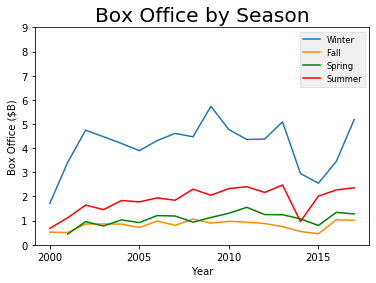

In [17]:
## Chart share of box office percentage by season across all years

winter = df_groupseason.loc[df_groupseason["season"]=="Winter"]
fall = df_groupseason.loc[df_groupseason["season"]=="Fall"]
spring = df_groupseason.loc[df_groupseason["season"]=="Spring"]
summer = df_groupseason.loc[df_groupseason["season"]=="Summer"]

fontP = FontProperties()
fontP.set_size('small')

plt.plot(winter["release_year"],winter["Box Office"],label='Winter')
plt.plot(fall["release_year"],fall["Box Office"],label='Fall',color='#FF8C00')
plt.plot(spring["release_year"],spring["Box Office"],label='Spring',color='g')
plt.plot(summer["release_year"],summer["Box Office"],label='Summer',color='r')
plt.style.use('fivethirtyeight')
plt.legend(loc='best',prop=fontP,framealpha=1)
plt.xticks(np.arange(2000, 2020, step=5))
plt.yticks(np.arange(0, 10, step=1))
plt.title('Box Office by Season')
plt.xlabel('Year')
plt.ylabel('Box Office ($B)')

plt.savefig('season_images/BoxOfficeBySeason.png')
plt.show()

In [18]:
# Plot null hypothesis
#Hypothesis:  Summer movies have a higher average box office per movie than other seasons
#NULL Hypothesis:  There are no seasonal trends for box office success.

# Determine the sum box office totals across sample size, as well as the sample size number
sum_boxoffice = df_groupseason["Box Office"].sum()
count_boxoffice = df_groupseason["Box Office"].count()

# Calculate estimated mean box office per season
expected_mean = sum_boxoffice/count_boxoffice

# Insert expected results into each row
df_nullhypothesis = df_groupseason
df_nullhypothesis["Expected Box Office"] = expected_mean


In [19]:
# ANOVA

stats.f_oneway(winter["Box Office"],fall["Box Office"],spring["Box Office"],summer["Box Office"])

F_onewayResult(statistic=117.06472803486665, pvalue=1.381703924529589e-26)

In [20]:
critical_value = stats.chi2.ppf(q = 0.95, df = 2)

critical_value

# Run the chi square test with stats.chisquare()
stats.chisquare(df_nullhypothesis['Box Office'], df_nullhypothesis['Expected Box Office'])

Power_divergenceResult(statistic=72.6616496300773, pvalue=0.3903653749813877)

## Conclusion

Since the chi square value of 72.66 exceeds the critical value of 5.99, we can conclude that the results are statistically significant.